# Начинаем с просмотра данных в задании

In [110]:
# Изучение данных
import pandas as pd
import seaborn as sns

# Инструменты
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, cross_val_score

# Модели
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Метрики
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
data = pd.read_csv('train_AIC.csv')
data.head()

,Поставщик,Материал,Категорийный менеджер,Операционный менеджер,Завод,Закупочная организация,Группа закупок,Балансовая единица,ЕИ,Группа материалов,...,Количество изменений после согласований,Дней между 0_1,Дней между 1_2,Дней между 2_3,Дней между 3_4,Дней между 4_5,Дней между 5_6,Дней между 6_7,Дней между 7_8,y
0,606,7448,4.0,5.0,1.0,1.0,9.0,1.0,1.0,150.0,...,11.0,82.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,1.0
1,7,27439,1.0,1.0,21.0,15.0,255.0,12.0,3.0,12.0,...,11.0,12.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
2,318,27213,1.0,20.0,11.0,12.0,4.0,1.0,1.0,11.0,...,12.0,27.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0
3,1768,19949,5.0,2.0,1.0,1.0,55.0,1.0,1.0,34.0,...,14.0,2.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0
4,7,27439,1.0,1.0,12.0,9.0,8.0,1.0,3.0,12.0,...,7.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0


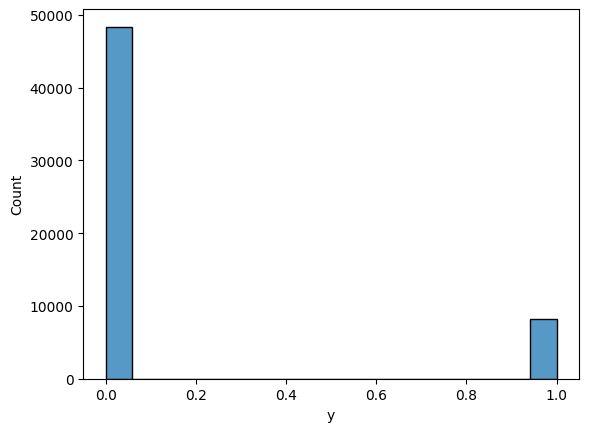

In [53]:
sns.histplot(data['y']);

Нам нужно применить `shuffle`, т.к. очень сильно разнится кол-во значений

## Слишком много columns, наверное многие из них - лишние

In [3]:
len(data.columns)

44

In [4]:
data.columns

Index(['Поставщик', 'Материал', 'Категорийный менеджер',
       'Операционный менеджер', 'Завод', 'Закупочная организация',
       'Группа закупок', 'Балансовая единица', 'ЕИ', 'Группа материалов',
       'Вариант поставки', 'НРП', 'Длительность', 'До поставки', 'Месяц1',
       'Месяц2', 'Месяц3', 'День недели 2', 'Сумма', 'Количество позиций',
       'Количество', 'Количество обработчиков 7', 'Количество обработчиков 15',
       'Количество обработчиков 30', 'Согласование заказа 1',
       'Согласование заказа 2', 'Согласование заказа 3',
       'Изменение даты поставки 7', 'Изменение даты поставки 15',
       'Изменение даты поставки 30',
       'Отмена полного деблокирования заказа на закупку',
       'Изменение позиции заказа на закупку: изменение даты поставки на бумаге',
       'Изменение позиции заказа на закупку: дата поставки',
       'Количество циклов согласования',
       'Количество изменений после согласований', 'Дней между 0_1',
       'Дней между 1_2', 'Дней между 2_3'

## Корреляция между факторами и 'y'

In [11]:
data.corr()['y']

Поставщик                                                                 0.064366
Материал                                                                  0.050751
Категорийный менеджер                                                    -0.006624
Операционный менеджер                                                    -0.034955
Завод                                                                     0.067366
Закупочная организация                                                    0.088046
Группа закупок                                                            0.037139
Балансовая единица                                                        0.067208
ЕИ                                                                        0.061415
Группа материалов                                                         0.028801
Вариант поставки                                                          0.049242
НРП                                                                       0.025258
Длит

In [14]:
mean_corr = data.corr()['y'].mean()
mean_corr

0.039120482072934164

In [21]:
corr = data.corr()['y']
corr = corr[(corr >= mean_corr) | (corr <= -mean_corr)]
corr

Поставщик                     0.064366
Материал                      0.050751
Завод                         0.067366
Закупочная организация        0.088046
Балансовая единица            0.067208
ЕИ                            0.061415
Вариант поставки              0.049242
Длительность                 -0.094121
Месяц2                       -0.046196
Сумма                         0.113534
Количество обработчиков 7     0.112452
Количество обработчиков 15    0.112058
Количество обработчиков 30    0.112935
y                             1.000000
Name: y, dtype: float64

## Снизу находятся корреляции, которые нас интересуют, так как они по значению больше *(или меньше)*, чем среднее между всеми корреляцифями факторов

In [27]:
corr[:len(corr)-1]

Поставщик                     0.064366
Материал                      0.050751
Завод                         0.067366
Закупочная организация        0.088046
Балансовая единица            0.067208
ЕИ                            0.061415
Вариант поставки              0.049242
Длительность                 -0.094121
Месяц2                       -0.046196
Сумма                         0.113534
Количество обработчиков 7     0.112452
Количество обработчиков 15    0.112058
Количество обработчиков 30    0.112935
Name: y, dtype: float64

In [28]:
corr[:len(corr)-1].max()

0.11353351073674493

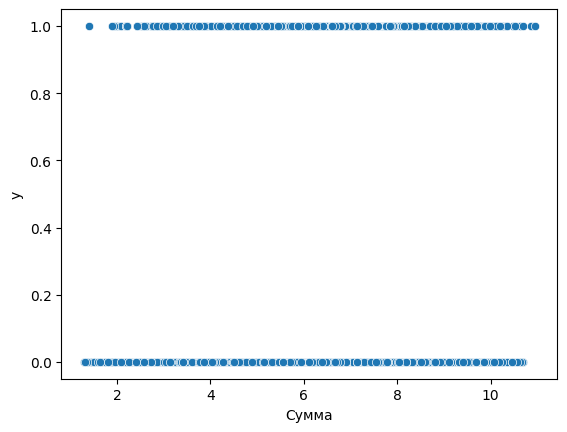

In [32]:
sns.scatterplot(data=data, x='Сумма', y='y');

In [38]:
corr.index

Index(['Поставщик', 'Материал', 'Завод', 'Закупочная организация',
       'Балансовая единица', 'ЕИ', 'Вариант поставки', 'Длительность',
       'Месяц2', 'Сумма', 'Количество обработчиков 7',
       'Количество обработчиков 15', 'Количество обработчиков 30', 'y'],
      dtype='object')

In [47]:
len(corr.index)

14

## Снизу - датафрейм, с которым мы будем работать далее. Что с ним можно сделать?

___

- Во-первых, нам следует убрать `NaN` значения, скорее всего вставляя средние *(или максимально-частоповторяющиеся)* значения, чтобы не похерить точность модели

- Во-вторых, т.к. все данные уже числовые, нам не стоит делать любую ~кодировку~

- В-третьих, применить `minMaxScaler`, дабы нормализовать значения и упростить задачу для модели МО

- В-четвертых, подобрать модель МО и подобрать гипер- и обычные параметры для модели МО. **МОЖЕТ БЫТЬ**, использовать нейронные сети.

## 1. Займемся уборкой и уберем `NaN` значения

In [46]:
X_y = data[corr.index]
X_y

,Поставщик,Материал,Завод,Закупочная организация,Балансовая единица,ЕИ,Вариант поставки,Длительность,Месяц2,Сумма,Количество обработчиков 7,Количество обработчиков 15,Количество обработчиков 30,y
0,606,7448,1.0,1.0,1.0,1.0,1.0,190.0,4.0,6.740725,4.0,4.0,4.0,1.0
1,7,27439,21.0,15.0,12.0,3.0,2.0,17.0,9.0,7.876672,6.0,7.0,7.0,0.0
2,318,27213,11.0,12.0,1.0,1.0,2.0,67.0,7.0,5.029520,5.0,5.0,6.0,0.0
3,1768,19949,1.0,1.0,1.0,1.0,1.0,83.0,2.0,5.987879,7.0,7.0,7.0,0.0
4,7,27439,12.0,9.0,1.0,3.0,2.0,21.0,12.0,7.839027,2.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56550,2,12690,2.0,2.0,2.0,1.0,2.0,43.0,3.0,5.138864,7.0,7.0,7.0,0.0
56551,674,21997,6.0,5.0,5.0,2.0,2.0,90.0,4.0,4.889430,5.0,5.0,5.0,0.0
56552,4,4060,1.0,1.0,1.0,1.0,2.0,32.0,1.0,2.395721,7.0,7.0,7.0,0.0
56553,4,491,1.0,1.0,1.0,2.0,2.0,82.0,1.0,4.043601,8.0,8.0,9.0,0.0


In [51]:
X_y['Сумма'].mean()

6.031934413580152

In [61]:
X_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56555 entries, 0 to 56554
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Поставщик                   56555 non-null  int64  
 1   Материал                    56555 non-null  int64  
 2   Завод                       56554 non-null  float64
 3   Закупочная организация      56554 non-null  float64
 4   Балансовая единица          56554 non-null  float64
 5   ЕИ                          56554 non-null  float64
 6   Вариант поставки            56554 non-null  float64
 7   Длительность                56554 non-null  float64
 8   Месяц2                      56554 non-null  float64
 9   Сумма                       56554 non-null  float64
 10  Количество обработчиков 7   56554 non-null  float64
 11  Количество обработчиков 15  56554 non-null  float64
 12  Количество обработчиков 30  56554 non-null  float64
 13  y                           565

In [62]:
data_test = pd.read_csv('test_AIC.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 43 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Поставщик                                                               25000 non-null  int64  
 1   Материал                                                                25000 non-null  int64  
 2   Категорийный менеджер                                                   25000 non-null  int64  
 3   Операционный менеджер                                                   25000 non-null  int64  
 4   Завод                                                                   25000 non-null  int64  
 5   Закупочная организация                                                  25000 non-null  int64  
 6   Группа закупок                                                          25000 

В данных есть один объект, который имеет `NaN` значения ВЕЗДЕ.

Скорее всего, его **стоит удалить**, т.к. этот один объект особо не изменит работу программы при удалении

In [63]:
X_y = X_y.drop([56554])

In [66]:
X_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56554 entries, 0 to 56553
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Поставщик                   56554 non-null  int64  
 1   Материал                    56554 non-null  int64  
 2   Завод                       56554 non-null  float64
 3   Закупочная организация      56554 non-null  float64
 4   Балансовая единица          56554 non-null  float64
 5   ЕИ                          56554 non-null  float64
 6   Вариант поставки            56554 non-null  float64
 7   Длительность                56554 non-null  float64
 8   Месяц2                      56554 non-null  float64
 9   Сумма                       56554 non-null  float64
 10  Количество обработчиков 7   56554 non-null  float64
 11  Количество обработчиков 15  56554 non-null  float64
 12  Количество обработчиков 30  56554 non-null  float64
 13  y                           565

## 2. Кодировка - пропускается

## 3. **СНАЧАЛА ДЕЛИМ ДАННЫЕ НА ВЫБОРКИ**, а потом уже применяем `minMaxScaler`, т.к.:

> *...В целях предотвращения распространения информации о распределении тестового набора, попадающего в вашу модель, вы должны выбрать вариант № 2 и установить масштабатор только на свои тренировочные данные, а затем стандартизировать как обучающий, так и тестовый наборы с этим масштабатором...*

[Источник](https://qastack.ru/datascience/38395/standardscaler-before-and-after-splitting-data)

In [68]:
X = X_y.drop(columns=['y'])
y = X_y['y']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)  ## Разбиваем данные 80/20 и применяем shuffle

In [71]:
X_train

,Поставщик,Материал,Завод,Закупочная организация,Балансовая единица,ЕИ,Вариант поставки,Длительность,Месяц2,Сумма,Количество обработчиков 7,Количество обработчиков 15,Количество обработчиков 30
9773,86,6696,1.0,1.0,1.0,2.0,1.0,29.0,9.0,6.000398,9.0,9.0,9.0
50936,781,6441,1.0,1.0,1.0,3.0,2.0,34.0,9.0,7.835330,6.0,7.0,7.0
2685,1132,27439,1.0,1.0,1.0,1.0,1.0,56.0,7.0,7.183799,6.0,6.0,6.0
52147,12,27439,6.0,5.0,5.0,1.0,2.0,35.0,2.0,4.491205,10.0,10.0,10.0
1566,2,3855,1.0,1.0,1.0,1.0,2.0,18.0,10.0,4.606946,7.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45891,132,287,5.0,4.0,4.0,1.0,2.0,22.0,9.0,7.175985,7.0,7.0,7.0
52416,18,5115,1.0,1.0,1.0,3.0,1.0,82.0,3.0,7.557519,13.0,13.0,13.0
42613,431,27439,1.0,1.0,1.0,1.0,2.0,3.0,7.0,7.639865,6.0,6.0,6.0
43567,157,27439,1.0,1.0,1.0,1.0,1.0,56.0,3.0,5.704491,7.0,7.0,7.0


In [76]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[0.03126149, 0.24400467, 0.        , ..., 0.23529412, 0.23529412,
        0.23529412],
       [0.28687017, 0.23471098, 0.        , ..., 0.14705882, 0.17647059,
        0.17647059],
       [0.41596175, 1.        , 0.        , ..., 0.14705882, 0.14705882,
        0.14705882],
       ...,
       [0.15814638, 1.        , 0.        , ..., 0.14705882, 0.14705882,
        0.14705882],
       [0.05737403, 1.        , 0.        , ..., 0.17647059, 0.17647059,
        0.17647059],
       [0.2096359 , 0.06662293, 0.25316456, ..., 0.14705882, 0.14705882,
        0.14705882]])

In [87]:
scaler = MinMaxScaler()
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[2.83927915e-01, 2.35257672e-01, 0.00000000e+00, ...,
        2.97297297e-01, 2.97297297e-01, 3.24324324e-01],
       [1.49687385e-01, 5.64764196e-01, 1.11111111e-01, ...,
        2.70270270e-02, 2.70270270e-02, 5.40540541e-02],
       [5.07539537e-02, 9.91581019e-01, 0.00000000e+00, ...,
        1.35135135e-01, 1.35135135e-01, 1.35135135e-01],
       ...,
       [3.75137918e-02, 2.41672134e-01, 5.55555556e-02, ...,
        1.35135135e-01, 1.35135135e-01, 1.62162162e-01],
       [1.32033836e-01, 4.58087324e-01, 4.30555556e-01, ...,
        5.40540541e-02, 5.40540541e-02, 5.40540541e-02],
       [3.67782273e-04, 1.00000000e+00, 1.38888889e-02, ...,
        1.08108108e-01, 1.08108108e-01, 1.08108108e-01]])

___
# 4. Начинаем подбирать и обучать модели МО

- ~Метод k-ближайших соседей (K-Nearest Neighbors)~ -- **0.33 (F1-score)**;
- Классификатор дерева решений (Decision Tree Classifier) / Случайный лес (Random Forests);
- Наивный байесовский метод (Naive Bayes);
- Линейный дискриминантный анализ (Linear Discriminant Analysis);
- ~Логистическая регрессия (Logistic Regression)~  -- **0.24 (F1-score)**;
- Глубокое обучение и нейронные сети;

# Логистическая Регрессия (LogisticRegression)

In [81]:
model = LogisticRegression(penalty='none')

In [82]:
model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty='none')

In [86]:
# Accuracy score
model.score(X_train_scaled, y_train)

0.8548283712397498

In [93]:
recall_score(y_train, model.predict(X_train_scaled))

0.019859456156431407

In [91]:
f1_score(y_train, model.predict(X_train_scaled))

0.03807850029291154

In [94]:
accuracy_score(y_test, model.predict(X_test_scaled))

0.8548315798779949

In [95]:
f1_score(y_test, model.predict(X_test_scaled))

0.024940617577197146

___
# k-ближайших соседей (k-nearest neighbours)

In [97]:
knn = KNeighborsClassifier(n_neighbors=5)

In [100]:
knn = knn.fit(X_train_scaled, y_train)

In [101]:
knn.score(X_train_scaled, y_train)

0.8933757708374777

In [102]:
f1_score(y_train, knn.predict(X_train_scaled))

0.5092573753814853

In [103]:
f1_score(y_test, knn.predict(X_test_scaled))

0.2582691436338922

In [104]:
knn20 = KNeighborsClassifier(n_neighbors=20)
knn20 = knn20.fit(X_train_scaled, y_train)
print("Accuracy: ", knn20.score(X_train_scaled, y_train))
print("F1-score(train): ", f1_score(y_train, knn20.predict(X_train_scaled)))
print("F1-score(test): ", f1_score(y_test, knn20.predict(X_test_scaled)))

Accuracy:  0.8683774285524832
F1-score(train):  0.2403367776502105
F1-score(test):  0.16755602988260404


In [105]:
knn2 = KNeighborsClassifier(n_neighbors=2)
knn2 = knn2.fit(X_train_scaled, y_train)
print("Accuracy: ", knn2.score(X_train_scaled, y_train))
print("F1-score(train): ", f1_score(y_train, knn2.predict(X_train_scaled)))
print("F1-score(test): ", f1_score(y_test, knn2.predict(X_test_scaled)))

Accuracy:  0.9133788652388215
F1-score(train):  0.5727679058105309
F1-score(test):  0.22114920328343796


In [106]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1 = knn1.fit(X_train_scaled, y_train)
print("Accuracy: ", knn1.score(X_train_scaled, y_train))
print("F1-score(train): ", f1_score(y_train, knn1.predict(X_train_scaled)))
print("F1-score(test): ", f1_score(y_test, knn1.predict(X_test_scaled)))

Accuracy:  0.9998894856662909
F1-score(train):  0.9996179998471998
F1-score(test):  0.33039945836154366


___
# Случайный Лес (Random Forest)

In [108]:
RFC = RandomForestClassifier(random_state=0)

In [109]:
# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300,1000],      # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],     # Maximum depth of each tree
    'min_samples_split': [2, 5, 10,15],    # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4,6]       # Minimum number of samples required to be at a leaf node
}

In [112]:
grid_search = GridSearchCV(estimator=RFC, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: ignored

In [ ]:
# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

In [ ]:
# Create a Random Forest Classifier with the best hyperparameters
RFC_best = RandomForestClassifier(random_state=42, **best_params)